In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import neattext.functions as nfx
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [3]:
file = pd.read_csv("./data/Suicide_Detection.csv")

file.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


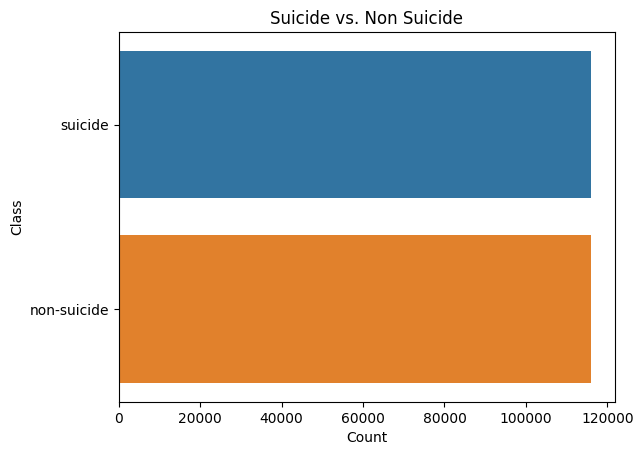

In [6]:
class_counts = file['class'].value_counts()

# Create a bar plot of the value counts using Seaborn
sns.barplot(x=class_counts.values, y=class_counts.index)

# Add a title, x-label, and y-label to the plot
plt.title('Suicide vs. Non Suicide')
plt.xlabel('Count')
plt.ylabel('Class')

# Show the plot
plt.show()


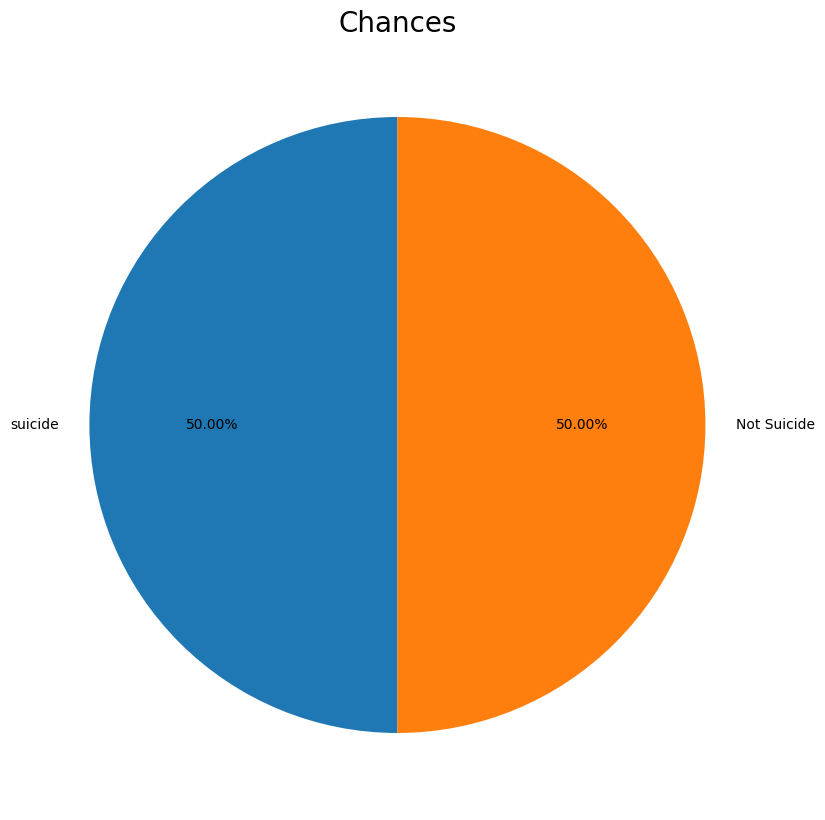

In [7]:
plt.figure(figsize=(12,10))
plt.pie(class_counts,startangle=90, autopct='%0.2f%%',labels=['suicide','Not Suicide'])
plt.title('Chances',fontdict={'size':20})
plt.show()

In [18]:


def clean_text(text):
    text_length=[]
    cleaned_text=[]
    lemmatizer = WordNetLemmatizer()
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
        sent = nfx.remove_emojis(sent)
        words = nltk.word_tokenize(sent)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        sent = ' '.join(lemmatized_words)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

In [15]:

train_data,test_data=train_test_split(file,test_size=0.2,random_state=10)


In [19]:
cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)



100%|██████████| 46415/46415 [00:19<00:00, 2337.83it/s]


In [20]:
from keras.preprocessing.text import Tokenizer


tokenizer=Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)

In [21]:
word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)

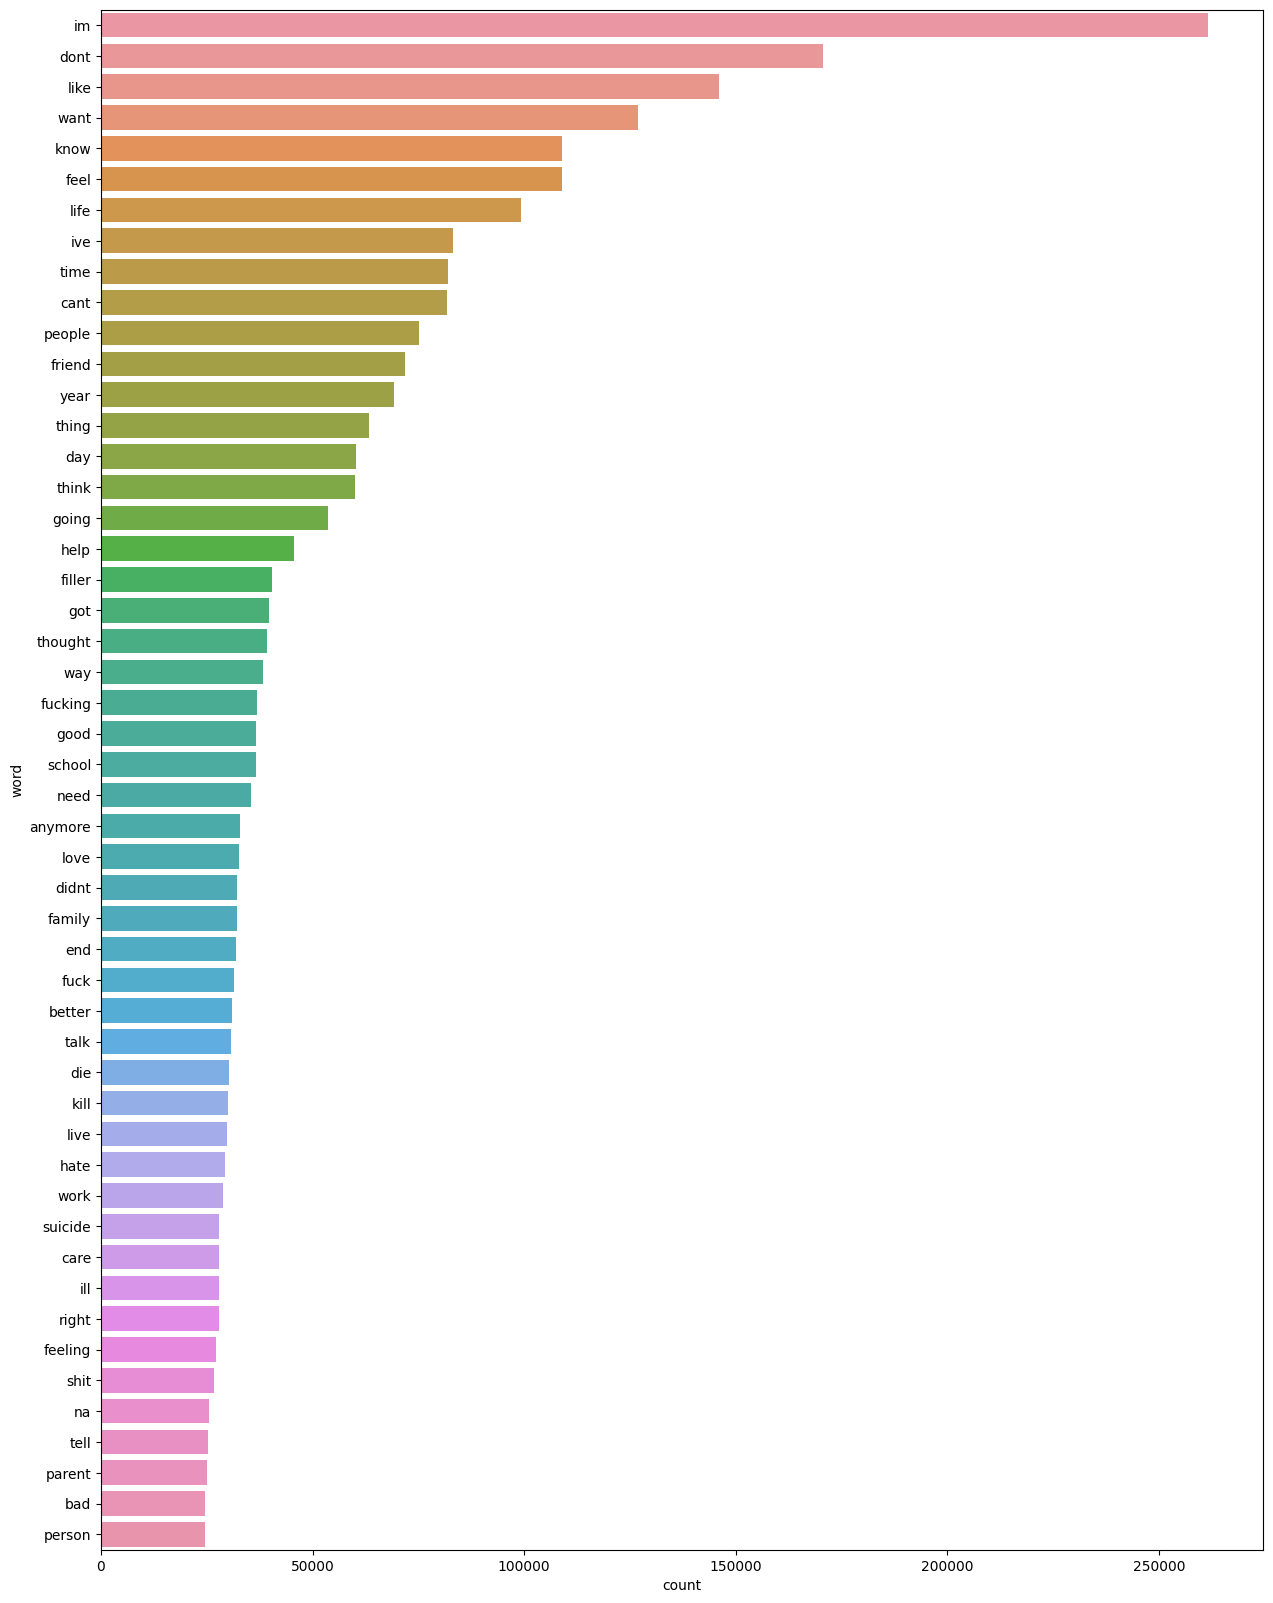

In [22]:
plt.figure(figsize=(15,20))
sns.barplot(x='count',y='word',data=word_freq.iloc[:50])
plt.show()